In [28]:
pwd

'/home/adish'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/home/adish/Downloads/diabetes.txt')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x= df.iloc[:,0:-1].values
y= df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 4)

In [7]:
xtrain

array([[  0.   ,  67.   ,  76.   , ...,  45.3  ,   0.194,  46.   ],
       [  1.   ,  80.   ,  55.   , ...,  19.1  ,   0.258,  21.   ],
       [  2.   , 105.   ,  75.   , ...,  23.3  ,   0.56 ,  53.   ],
       ...,
       [  6.   , 107.   ,  88.   , ...,  36.8  ,   0.727,  31.   ],
       [  2.   ,  75.   ,  64.   , ...,  29.7  ,   0.37 ,  33.   ],
       [  2.   , 107.   ,  74.   , ...,  33.6  ,   0.404,  23.   ]])

In [8]:
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
xtrain = scx.fit_transform(xtrain)
xtest = scx.transform(xtest)

In [9]:
xtrain

array([[-1.13297401, -1.70544954,  0.3837674 , ...,  1.63727815,
        -0.83696713,  1.09138367],
       [-0.83670227, -1.29149491, -0.6919493 , ..., -1.55372817,
        -0.6446041 , -1.0400081 ],
       [-0.54043053, -0.4954283 ,  0.33254279, ..., -1.04219281,
         0.26310891,  1.68817336],
       ...,
       [ 0.64465642, -0.43174297,  0.99846265, ...,  0.60202801,
         0.76505617, -0.18745139],
       [-0.54043053, -1.45070823, -0.23092786, ..., -0.26271035,
        -0.30796881, -0.01694005],
       [-0.54043053, -0.43174297,  0.28131819, ...,  0.21228678,
        -0.20577596, -0.86949676]])

## Svm classifier

In [12]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(xtrain, ytrain)
y_pred_svm = model_SVC.decision_function(xtest)
#Normally we use predict() function ,but for plotting ROC we use decision_function().
#[predict()--> gives a probability value ranging from 0 to 1]
#decision_function()--> it outputs a number which tells us how far the point is from classification plane.

#The decision function tells us on which side of the hyperplane 
#generated by the classifier we are (and how far we are away from it)

## Logistic classifier

In [13]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(xtrain, ytrain)

y_pred_logistic = model_logistic.decision_function(xtest)

## PLOTTING ROC CURVE AND FINDING  THE AUC

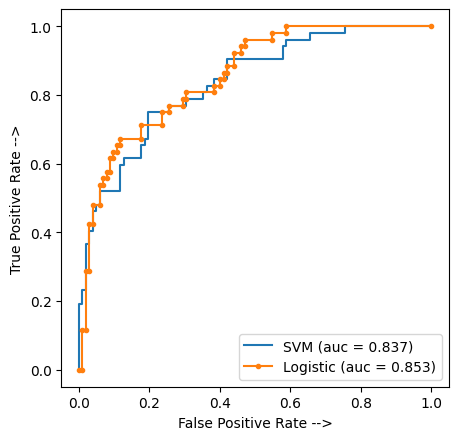

In [27]:

#calculation of roc and auc:


from sklearn.metrics import roc_curve, auc

#roc_curve()-->returns False positive rate,True positive rate and threshold
logistic_fpr, logistic_tpr, threshold = roc_curve(ytest, y_pred_logistic)

#auc()-->returns the area under the curve
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(ytest, y_pred_svm)

auc_svm = auc(svm_fpr, svm_tpr)


#plotting


#Figure size (figsize) determines the size of the figure in inches. 
#Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100

plt.figure(figsize=(5, 5), dpi=100)
#0.3-->upto how many places after decimal-->0.3 means 3places after decimal.
#f-floatingpoint
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## conclusion:

### the auc for logistic regression > auc for svm
### so we'll be choosing logistic regression over svm